In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy import optimize

def plot_polyfit(x_data,poly_coefficents):
    l = len(x_data)
    output = np.zeros(l)
    for i,a in enumerate(poly_coefficents[::-1]):
        for j in range(l):
            output[j] += a*x_data[j]**i 
    return output

def full_lorenzian_fit_with_skew(fs, f0,Q,Smax,A1,A2,A3):#fs is the data, f0 is the resonance freq
    return A1 + A2*fs + (Smax+A3*fs)/np.sqrt(1+4*(Q*(fs/f0-1))**2)#this is eq 10 from Measurement of resonant frequency and quality factor of microwave resonators: Comparison of methods Paul J. Petersan; Steven M. Anlage

def calc_mu(omega,rho_a,rho_c,length=2e-3,width=1e-3,tolerance = 1e-6):
    mu_0 = 4*np.pi*1e-7
    total_sum = 0
    n = 1
    change = np.inf
    while np.abs(change)>tolerance:
        alpha_n = np.sqrt(-1j*(omega*mu_0*(length/np.pi)**2/rho_c-1j*rho_a/rho_c*(length*n/width)**2))
        gamma_n = np.sqrt(-1j*(omega*mu_0*(width/np.pi)**2/rho_a-1j*rho_c/rho_a*n**2))

        change = (np.tan(np.pi*alpha_n/2)/alpha_n+np.tan(np.pi*gamma_n/2)/gamma_n)/n**2
        total_sum += change
        n += 2
    return total_sum*16/(np.pi)**3

def cosort_lists(list_to_sort,list_to_cosort):
    out1 = np.zeros(l1 := len(list_to_sort))
    out2 = np.zeros(len(list_to_cosort))
    sorted_inds = np.argsort(np.argsort(list_to_sort))
    for i in range(l1):
        for j, ind in enumerate(sorted_inds):
            if i == ind:
                out1[i] = list_to_sort[j]
                out2[i] = list_to_cosort[j]
                break
    return out1, out2

Get Resistiivity

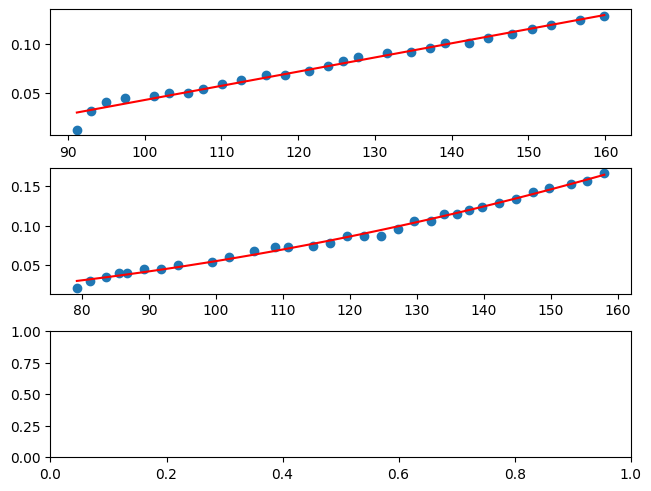

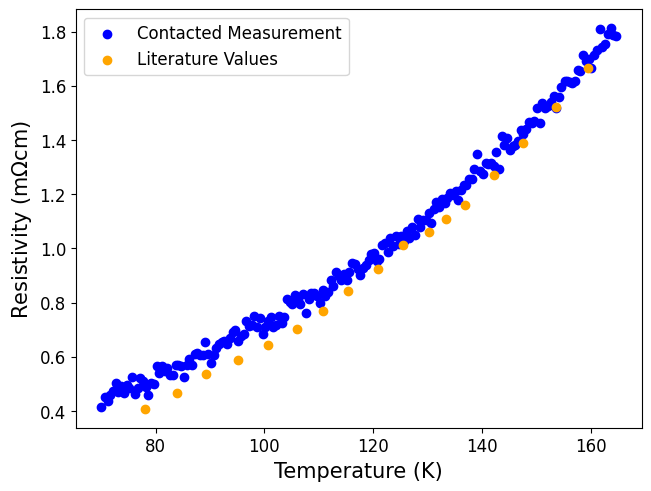

In [3]:
res_temps = []
resists = []

#UD 78 and OP 95
read_path = 'C:/Users/blake/Documents/VSCode/Python/Greven/RawData/ContactedResistivity/Hg1201/'
data_paths =  os.listdir(read_path)

for i, data_path in enumerate(data_paths):
    data = np.loadtxt(read_path+data_path,delimiter=",", dtype=np.float64)
    # print(data)
    temp = data[:,0] # kelvin
    res = data[:,1] #mohm cm = 1000 micro ohm cm

    ind = np.logical_and(temp>77, temp<160)
    res_temps.append(temp[ind])
    resists.append(res[ind])


#STO
read_path = 'C:/Users/blake/Documents/VSCode/Python/Greven/RawData/ContactedResistivity/STO/'
#sample is 2.1mm by 2.1mm
data_paths =  os.listdir(read_path)
for data_path in data_paths:
    if data_path[-3:] == 'dat':
        filename = read_path+data_path
        f = open(filename,'r')
        

        # Parse Header
        # Skip 1 more row that what is picked out by the loop below. (In order to skip the column headings)
        skip = 1

        # Loop over lines to find the beginning of the data section
        break_next = False
        for line in f:
            if break_next:
                # print(line)
                headers = line.split(',')
                break
            skip += 1
            # Stop at the beginning of the Data section
            if line == "[Data]\n":
                break_next = True
            # Extract the measurement date and time
            else:
                if line[:12] == "FILEOPENTIME":
                    splitLine = line.split(" ")
                    timestamp = splitLine[1]
        temp,resistiance = np.loadtxt(filename, delimiter=',', skiprows=skip, usecols=(3,21), unpack=True)
        res_temps.append(temp)
        resists.append(resistiance)
    else:
        data = np.loadtxt(read_path+data_path,delimiter=",", dtype=np.float64)
        # print(data)
        temp = data[:,0] # kelvin
        res = data[:,1] #mohm cm = 1000 micro ohm cm

        ind = np.logical_and(temp>77, temp<160)
        bonus_temp = np.array(temp[ind])
        bonus_res = np.array(res[ind])/100

for i in range(len(res_temps)):
    res_temps[i] = np.array(res_temps[i])
    resists[i] = np.array(resists[i])
resists[2] = resists[2] *np.pi*1e-3/.5
# resists[2] = resists[2] * np.pi*1e-3/2/np.log(2)

        
fig = plt.figure(constrained_layout = True)
ax = fig.add_subplot(3, 1, 1)
bx = fig.add_subplot(3, 1, 2)
cx = fig.add_subplot(3, 1, 3)
fig1 = plt.figure(constrained_layout = True)
cx = fig1.add_subplot(1,1,1)
ax.scatter(res_temps[0],resists[0])
fit1 = np.polyfit(res_temps[0],resists[0],1)
ax.plot(res_temps[0],plot_polyfit(res_temps[0],fit1),c='red',label = 'Linear Fit')

bx.scatter(res_temps[1],resists[1])
fit2 = np.polyfit(res_temps[1],resists[1],2)
bx.plot(res_temps[1],plot_polyfit(res_temps[1],fit2),c='red',label = 'Quadratic Fit')
i = res_temps[2]<165
cx.scatter(res_temps[2][i],resists[2][i]*1e5,c='Blue',label = 'Contacted Measurement')
fit3 = np.polyfit(res_temps[2],resists[2],2)
cx.set_xlabel('Temperature (K)',fontsize = 15)
cx.set_ylabel(r'Resistivity (m$\Omega$cm)',fontsize = 15)
cx.tick_params(axis='x', labelsize=12)
cx.tick_params(axis='y', labelsize=12)
# cx.legend(fontsize='large')
#matplotlib.gridspec
# cx.plot(res_temps[2],plot_polyfit(res_temps[2],fit3),c='red',label = 'Quadratic Fit')
cx.scatter(bonus_temp,bonus_res*1e5,c='orange',label = 'Literature Values')# from https://journals-aps-org.ezp2.lib.umn.edu/prb/pdf/10.1103/PhysRevB.81.155110
for i in range(3):
    res_temps[i],resists[i] = cosort_lists(res_temps[i],resists[i])
fits = [fit1,fit2,fit3]
cx.legend(fontsize = 'large')

Get empties

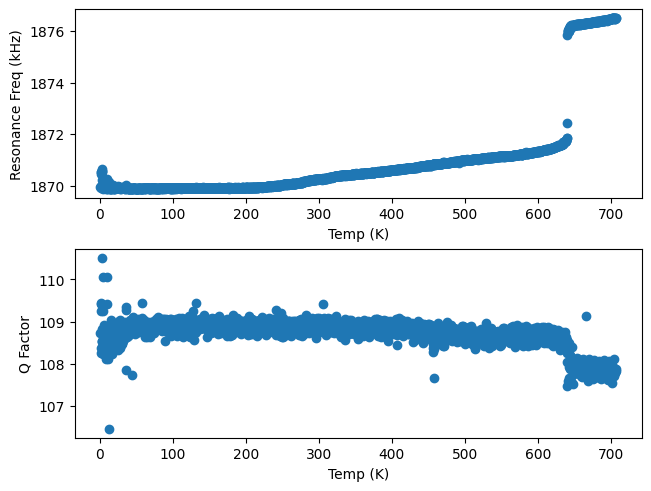

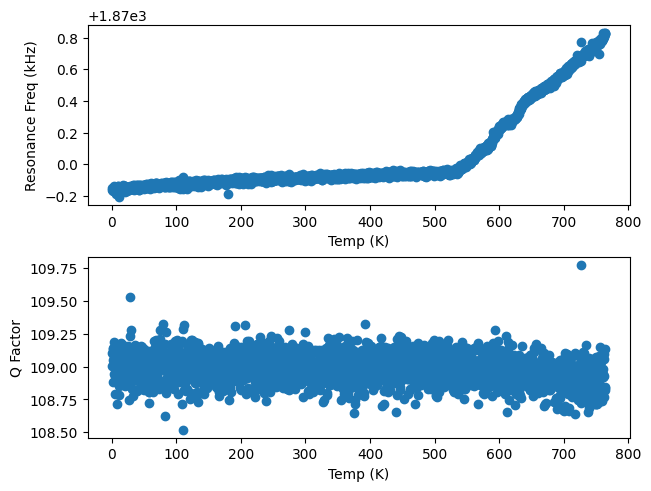

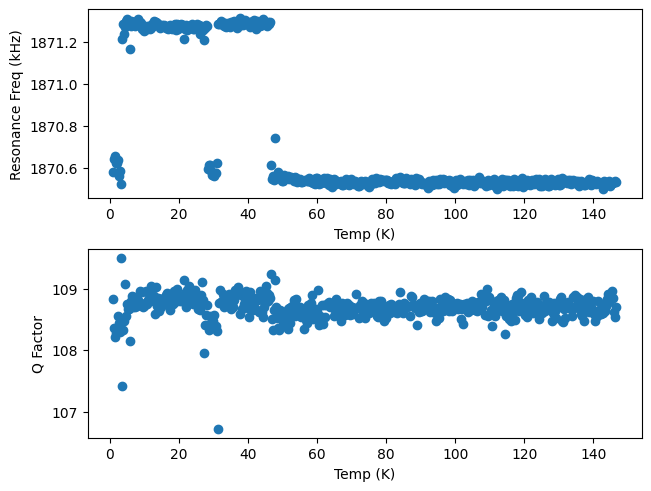

In [6]:
empty_files = ['C:/Users/blake/Documents/VSCode/Python/Greven/RawData/HeProbe/UnmeasuredOPEmpty.dat',
               'C:/Users/blake/Documents/VSCode/Python/Greven/RawData/HeProbe/empty2_21overnight.dat',
            #    'C:/Users/blake/Documents/VSCode/Python/Greven/RawData/HeProbe/2023_7_1bBefore.dat',
               'C:/Users/blake/Documents/VSCode/Python/Greven/RawData/HeProbe/STOempty.dat']


all_data = []
times = []
temps = []
vxs = []
vys = []
vmags = []
freqs = []
sweep_nums = []
all_Qs = []
all_fs = []
all_times = []
for i, filename in enumerate(empty_files):
    all_data.append(np.genfromtxt(filename, delimiter='\t'))
    times.append(np.array(all_data[i][1:,0]))
    temps.append(np.array(all_data[i][1:,1]))
    vxs.append(np.array(all_data[i][1:,2])*1000) #mV
    vys.append(np.array(all_data[i][1:,3])*1000) #mV
    vmags.append(np.array(all_data[i][1:,4])*1000) #mV
    freqs.append(np.array(all_data[i][1:,5])/1000) #kHz
    sweep_nums.append(np.array(all_data[i][1:,6]))

for j in range(len(all_data)):
    max_sweep = int(np.max(sweep_nums[j]))
    if max_sweep <1:
        print('No Scans found')
    avg_temps = np.zeros(max_sweep)
    avg_times = np.zeros(max_sweep)
    Qs = np.zeros(max_sweep)
    res_freqs = np.zeros(max_sweep)
    avg_vmagsmins = np.zeros(max_sweep)
    # fig2 = plt.figure(constrained_layout = True)
    # ax = fig2.add_subplot(1, 1, 1)
    

    for i in range(1,max_sweep+1):
        inds = np.logical_not(sweep_nums[j] != i)
        plot_times = times[j][inds]
        plot_temps = temps[j][inds]
        # plot_vxs = vxs[j][inds]
        # plot_vys = vys[j][inds]
        plot_vmags = vmags[j][inds]
        plot_freqs = freqs[j][inds]

        # guesses_simple = [plot_freqs[np.argmin(plot_vmags)],30,0,0]

        guesses1 = [plot_freqs[np.argmin(plot_vmags)],73,-2e3,7e2,-5e-2,.7]
        pbounds1 = np.array([[min(plot_freqs),1,-1e4,0,-1,-10],[max(plot_freqs),200,1e4,1e4,1,10]]) # [[Lower bounds],[upper bounds]]
        bestfit = optimize.curve_fit(full_lorenzian_fit_with_skew,plot_freqs,plot_vmags,guesses1, bounds=pbounds1)
        bestpars = bestfit[0]

        for m, bestpar in enumerate(bestpars):
            if pbounds1[0][m] != 0 and pbounds1[1][m] != 0:
                if np.abs((bestpar-pbounds1[0][m])/pbounds1[0][m])<.005 or np.abs((pbounds1[1][m]-bestpar)/pbounds1[1][m])<.005:
                    print(bestpar,pbounds1[0][m],pbounds1[1][m])
                    print((bestpar-pbounds1[0][m])/pbounds1[0][m],(pbounds1[1][m]-bestpar)/pbounds1[1][m])
                    print()

        avg_vmagsmins[i-1] = np.min(plot_vmags)

        res_freqs[i-1] = bestpars[0]
        Qs[i-1] = bestpars[1]
        avg_times[i-1] = np.average(plot_times)
        if np.average(plot_temps) == 0:
            avg_temps[i-1] = np.average(plot_times)
            
        else:
            avg_temps[i-1] = np.average(plot_temps)


        # ax.plot(plot_freqs,plot_vmags)
    # avg_Qs.append(np.average(Qs))
    # avg_res.append(np.average(res_freqs))
    # avg_mins.append(np.average(avg_vmagsmins))
    fig1 = plt.figure(constrained_layout = True)
    ax = fig1.add_subplot(2, 1, 1)
    bx = fig1.add_subplot(2, 1, 2)
    ax.set_xlabel('Temp (K)')
    ax.set_ylabel('Resonance Freq (kHz)')
    bx.set_xlabel('Temp (K)')
    bx.set_ylabel('Q Factor')
    # ax.set_title('As Grown Hg1201 with 15sec scan lengths')
    ax.scatter(avg_times,res_freqs)
    bx.scatter(avg_times,Qs)

    all_Qs.append(np.array(Qs))
    all_times.append(np.array(avg_times))
    all_fs.append(np.array(res_freqs))

In [7]:
mins = [160,160,90]
maxs = [180,180,120]
emptyQs = []
empty_res = []
for i in range(len(all_data)):
    inds = np.logical_and(all_times[i]>mins[i], all_times[i]<maxs[i])
    emptyQs.append(np.average(all_Qs[i]))
    empty_res.append(np.average(all_fs[i]))

print(emptyQs)
print(empty_res)

[108.73618698446248, 108.98240247385341, 108.70257171332513]
[1870.9482171686232, 1870.0414471476001, 1870.744644339078]


Get Contactless Measurement

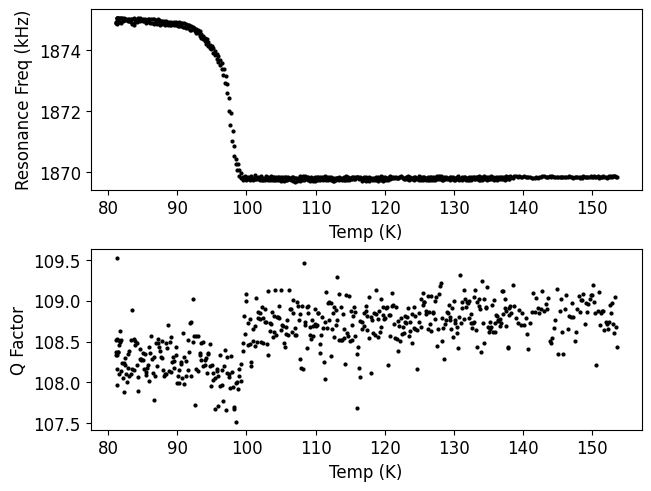

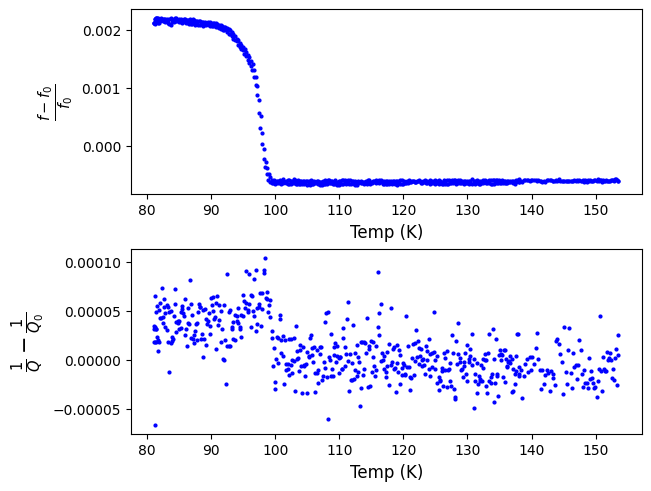

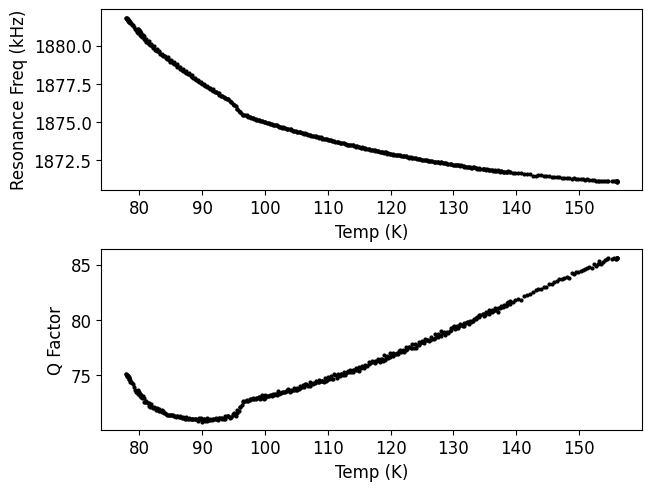

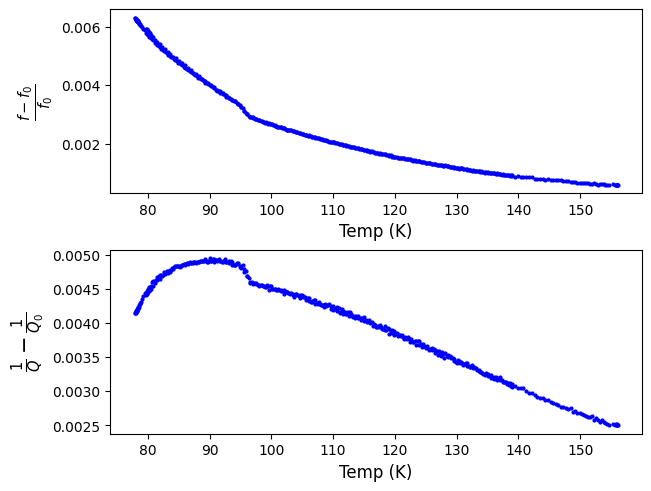

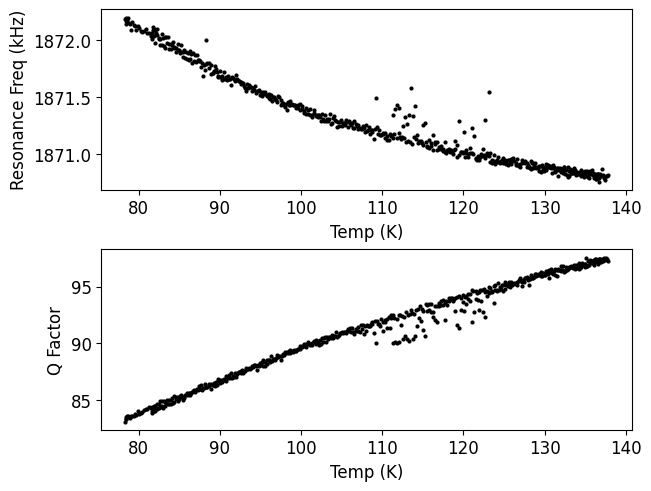

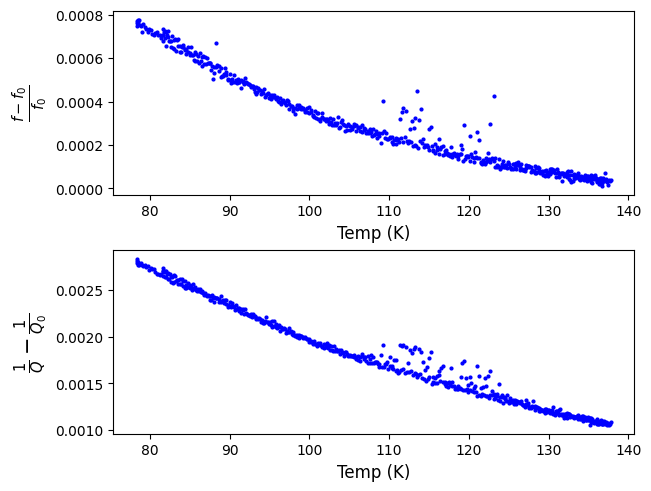

In [8]:
data_files = ['C:/Users/blake/Documents/VSCode/Python/Greven/RawData/HeProbe/UnmeasuredOP.dat',
               'C:/Users/blake/Documents/VSCode/Python/Greven/RawData/HeProbe/AsGrown2_21.dat',
            #    'C:/Users/blake/Documents/VSCode/Python/Greven/RawData/HeProbe/2023_7_1b.dat',
               'C:/Users/blake/Documents/VSCode/Python/Greven/RawData/HeProbe/STo1.4percent.dat']

all_data = []
times = []
temps = []
vxs = []
vys = []
vmags = []
freqs = []
sweep_nums = []
all_Qs = []
all_fs = []
all_times = []
for i, filename in enumerate(data_files):
    all_data.append(np.genfromtxt(filename, delimiter='\t'))
    times.append(np.array(all_data[i][1:,0]))
    temps.append(np.array(all_data[i][1:,1]))
    vxs.append(np.array(all_data[i][1:,2])*1000) #mV
    vys.append(np.array(all_data[i][1:,3])*1000) #mV
    vmags.append(np.array(all_data[i][1:,4])*1000) #mV
    freqs.append(np.array(all_data[i][1:,5])/1000) #kHz
    sweep_nums.append(np.array(all_data[i][1:,6]))
avg_Qs = []
avg_res = []
avg_mins = []
scanTs = []
scanQs = []
scanFs = []
for j in range(len(all_data)):
    max_sweep = int(np.max(sweep_nums[j]))
    if max_sweep <1:
        print('No Scans found')
    avg_temps = np.zeros(max_sweep)
    Qs = np.zeros(max_sweep)
    res_freqs = np.zeros(max_sweep)
    avg_vmagsmins = np.zeros(max_sweep)
    scanTs.append([])
    scanQs.append([])
    scanFs.append([])
    # fig2 = plt.figure(constrained_layout = True)
    # ax = fig2.add_subplot(1, 1, 1)
    

    for i in range(1,max_sweep+1):
        inds = np.logical_not(sweep_nums[j] != i)
        plot_times = times[j][inds]
        plot_temps = temps[j][inds]
        # plot_vxs = vxs[j][inds]
        # plot_vys = vys[j][inds]
        plot_vmags = vmags[j][inds]
        plot_freqs = freqs[j][inds]

        # guesses_simple = [plot_freqs[np.argmin(plot_vmags)],30,0,0]

        guesses1 = [plot_freqs[np.argmin(plot_vmags)],73,-2e3,7e2,-5e-2,.7]
        pbounds1 = np.array([[min(plot_freqs),1,-1e4,0,-1,-10],[max(plot_freqs),200,1e4,1e4,1,10]]) # [[Lower bounds],[upper bounds]]
        bestfit = optimize.curve_fit(full_lorenzian_fit_with_skew,plot_freqs,plot_vmags,guesses1, bounds=pbounds1)
        bestpars = bestfit[0]

        for m, bestpar in enumerate(bestpars):
            if pbounds1[0][m] != 0 and pbounds1[1][m] != 0:
                if np.abs((bestpar-pbounds1[0][m])/pbounds1[0][m])<.005 or np.abs((pbounds1[1][m]-bestpar)/pbounds1[1][m])<.005:
                    print(bestpar,pbounds1[0][m],pbounds1[1][m])
                    print((bestpar-pbounds1[0][m])/pbounds1[0][m],(pbounds1[1][m]-bestpar)/pbounds1[1][m])
                    print()

        avg_vmagsmins[i-1] = np.min(plot_vmags)

        res_freqs[i-1] = bestpars[0]
        Qs[i-1] = bestpars[1]
        if np.average(plot_temps) == 0:
            avg_temps[i-1] = np.average(plot_times)
        else:
            avg_temps[i-1] = np.average(plot_temps)


        # ax.plot(plot_freqs,plot_vmags)
    avg_Qs.append(np.average(Qs))
    avg_res.append(np.average(res_freqs))
    avg_mins.append(np.average(avg_vmagsmins))
    breakup_scans = False
    breakup_scans = True
    if breakup_scans:
        scan_temps = []
        scan_freqs = []
        scan_Q = []
        scan_ind = -1
        increasing  = False
        for w, T in enumerate(avg_temps):
            if increasing:
                if T >avg_temps[w-1]:
                    scan_temps[scan_ind].append(T)
                    scan_freqs[scan_ind].append(res_freqs[w])
                    scan_Q[scan_ind].append(Qs[w])
                else:
                    increasing = False

            elif  w == 0 or T>avg_temps[w-1]:
                scan_temps.append([T])
                scan_freqs.append([res_freqs[w]])
                scan_Q.append([Qs[w]])
                scan_ind +=1
                increasing = True

        res = empty_res[j]
        Q = emptyQs[j]
        
        fig1 = plt.figure(constrained_layout = True)
        ax = fig1.add_subplot(2, 1, 1)
        bx = fig1.add_subplot(2, 1, 2)
        ax.set_xlabel('Temp (K)',fontsize = 12)
        ax.set_ylabel('Resonance Freq (kHz)',fontsize = 12)
        bx.set_xlabel('Temp (K)',fontsize = 12)
        bx.set_ylabel('Q Factor',fontsize = 12)
        ax.tick_params(axis='x', labelsize=12)
        ax.tick_params(axis='y', labelsize=12)
        bx.tick_params(axis='x', labelsize=12)
        bx.tick_params(axis='y', labelsize=12)
        # ax.set_title('As Grown Hg1201 with 15sec scan lengths')
        # ax.set_title('Capacitance = '+str(cs[j]))
        # ax.scatter(avg_temps,res_freqs)
        sc = 1
        for ind in range(len(scan_freqs)):
            if len(scan_freqs[ind])>10:
                ax.scatter(scan_temps[ind],scan_freqs[ind],label = 'Scan '+str(sc),s=4,c='black')
                bx.scatter(scan_temps[ind],scan_Q[ind],label = 'Scan '+str(sc),s=4,c='black')
                sc+=1
                scanQs[j].append(scan_Q[ind])
                scanTs[j].append(scan_temps[ind])
                scanFs[j].append(scan_freqs[ind])
        # ax.scatter(scan_temps[1],scan_freqs[1],label = r'$1\frac{K}{min}$ ramp',s=4)
        # ax.scatter(scan_temps[3],scan_freqs[3],label = r'$2\frac{K}{min}$ ramp',s=4)
        # bx.scatter(scan_temps[1],scan_Q[1],label = r'$1\frac{K}{min}$ ramp',s=4)
        # bx.scatter(scan_temps[3],scan_Q[3],label = r'$2\frac{K}{min}$ ramp',s=4)
        # ax.legend()
        # bx.legend()
        
        
        fig2 = plt.figure(constrained_layout = True)
        cx = fig2.add_subplot(2, 1, 1)
        dx = fig2.add_subplot(2, 1, 2)
        cx.set_xlabel('Temp (K)',fontsize = 12)
        dx.set_ylabel(r'$\frac{1}{Q}-\frac{1}{Q_0}$',fontsize = 15)
        dx.set_xlabel('Temp (K)',fontsize = 12)
        cx.set_ylabel(r'$\frac{f-f_0}{f_0}$',fontsize = 15)
        # cx.set_title('As Grown Hg1201 with 15sec scan lengths',fontsize = 12)
        # p1 = 1/Q-1/np.array(scan_Q[1])
        # p2 = 1/Q-1/np.array(scan_Q[3])
        sc = 1
        for ind in range(len(scan_freqs)):
            if len(scan_freqs[ind])>10:
                cx.scatter(scan_temps[ind],(np.array(scan_freqs[ind])-res)/res,c='blue',label = 'Scan '+str(sc),s=4)
                dx.scatter(scan_temps[ind],-(1/Q-1/np.array(scan_Q[ind])),label = 'Scan '+str(sc),c='blue',s=4)
                sc+=1

        # dx.scatter(scan_temps[3],(np.array(scan_freqs[3])-res)/res,label = r'$2\frac{K}{min}$ ramp',s=4)
        # dx.scatter(scan_temps[1],(np.array(scan_freqs[1])-res)/res,label = r'$1\frac{K}{min}$ ramp',s=4)
        # cx.scatter(scan_temps[1],(-1/Q+1/np.array(scan_Q[1]))**-1,label = r'$1\frac{K}{min}$ ramp',s=4)
        # cx.scatter(scan_temps[3],(-1/Q+1/np.array(scan_Q[3]))**-1,label = r'$2\frac{K}{min}$ ramp',s=4)
        # cx.legend()
        # dx.legend()



    else:
        fig1 = plt.figure(constrained_layout = True)
        ax = fig1.add_subplot(2, 1, 1)
        bx = fig1.add_subplot(2, 1, 2)
        ax.set_xlabel('Temp (K)')
        ax.set_ylabel('Resonance Freq (kHz)')
        bx.set_xlabel('Temp (K)')
        bx.set_ylabel('Q Factor')
        # ax.set_title('As Grown Hg1201 with 15sec scan lengths')
        ax.scatter(avg_temps,res_freqs)
        bx.scatter(avg_temps,Qs)


Simulate Results

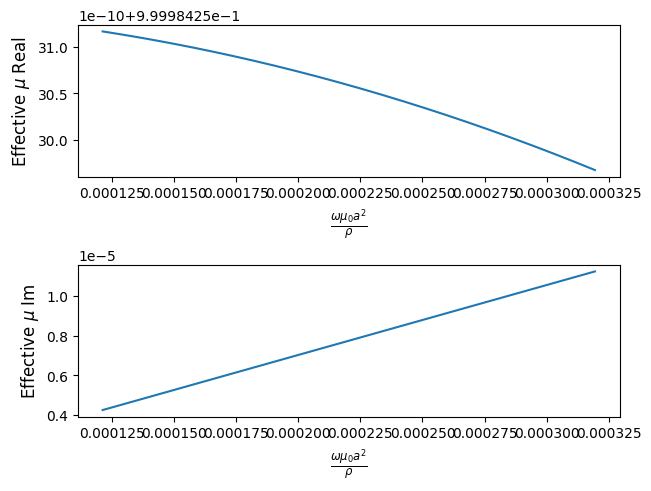

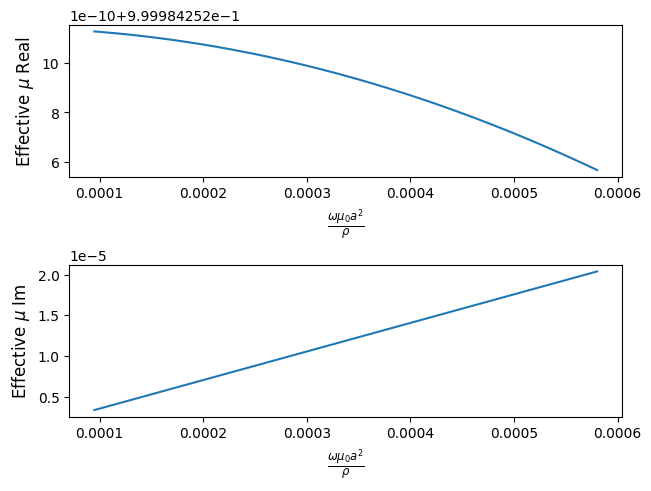

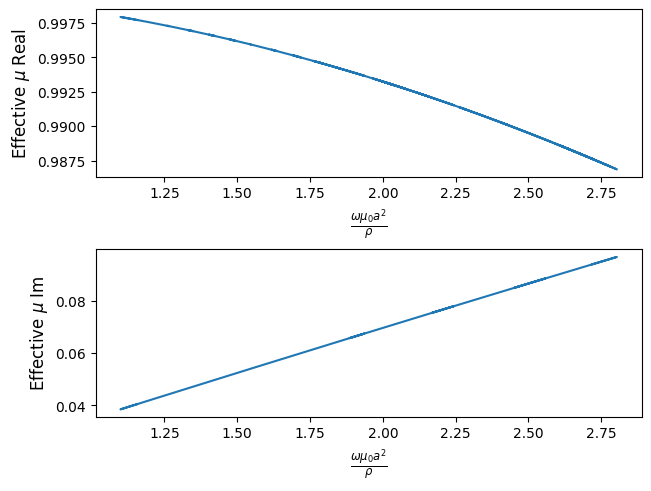

In [18]:
omega = 1.8699e6*2*np.pi
t_num =1000
Ts = np.array([np.linspace(100,155,t_num),np.linspace(80,155,t_num),np.linspace(80,140,t_num)])
mus = np.zeros((len(Ts),t_num),dtype=np.complex128)


coef = np.array([1,1,1])
res_coef = np.array([1e-5,1e-5,1])
mu_0 = 4*np.pi*1e-7
act_mus = []
temp_inds = []
for j in range(len(Ts)):
    # rhos = np.interp(Ts[j],res_temps[j],plot_polyfit(res_temps[j],fits[j]))
    
    rhos = np.interp(Ts[j],res_temps[j],resists[j])
    # print(rhos)
    # print(np.average(rhos))
    a = 1e-3
    
    for i, rho in enumerate(rhos):
        mus[j][i] = calc_mu(omega,rho,rho,a,a)
    # print(mus[j])
    fig4 = plt.figure(constrained_layout = True)
    ax1 = fig4.add_subplot(2, 1, 1)
    ax2 = fig4.add_subplot(2, 1, 2)
    ax1.set_xlabel(r'$\frac{\omega \mu_0 a^2}{\rho}$',fontsize = 12)
    ax1.set_ylabel(r'Effective $\mu$ Real',fontsize = 12)
    ax1.plot(coef[j]*mu_0*omega*a*a/rhos,np.real(mus[j]),label = 'Real Part')
    ax2.set_xlabel(r'$\frac{\omega \mu_0 a^2}{\rho}$',fontsize = 12)
    ax2.set_ylabel(r'Effective $\mu$ Im',fontsize = 12)
    ax2.plot(coef[j]*mu_0*omega*a*a/rhos,np.abs(np.imag(mus[j])),label = 'Imaginary Part')
    # ax1.set_xlim(0,100)
    # ax1.set_ylim(0,1)

    # ax1.legend()
    temp_inds.append(np.logical_and(res_temps[j]>78, res_temps[j]<137))
    act_mus.append(np.zeros(len(res_temps[j][temp_inds[j]]),dtype=np.complex128))
    for i, rho in enumerate(resists[j][temp_inds[j]]):
        act_mus[j][i] = calc_mu(omega,rho,rho,a,a)
    #literature values
    bonus_inds = np.logical_and(bonus_temp>78, bonus_temp<137)
    bonus_mus = np.zeros(len(bonus_temp[bonus_inds]),dtype=np.complex128)
    for i, rho in enumerate(bonus_res[bonus_inds]):
        bonus_mus[i] = calc_mu(omega,rho,rho,a,a)

Combine Plots

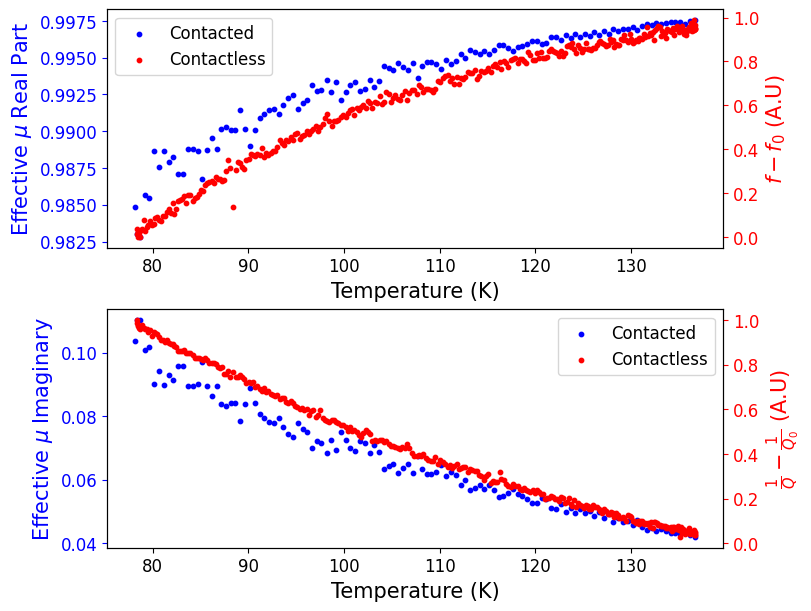

In [31]:
fig4 = plt.figure(constrained_layout = True,figsize=(8,6))
ax1 = fig4.add_subplot(2, 1, 1)
ax2 = fig4.add_subplot(2, 1, 2)
ax1.set_xlabel('Temperature (K)',fontsize = 15)
ax1.set_ylabel(r'Effective $\mu$ Real Part',fontsize = 15, color='blue')
ax1.tick_params('y', colors='blue', labelsize=12)
ax1a = ax1.twinx()
ax2a = ax2.twinx()

# Plot on the twin axis
ax1a.scatter(scanTs[2][0][0],(1+(-(scanFs[2][0]-empty_res[2])/120)/np.max(np.abs(-(scanFs[2][0]-empty_res[2])/120)))[0],label = 'Contacted',c='blue',s=10)
ax1a.scatter(scanTs[2][0],1+(-(scanFs[2][0]-empty_res[2])/120)/np.max(np.abs(-(scanFs[2][0]-empty_res[2])/120)),c='red',s=10,label = 'Contactless')
# ax1a.scatter(scanTs[2][0],1+(-(scanFs[2][0]-empty_res[2])/120)/np.max(np.abs(-(scanFs[2][0]-empty_res[2])/120)),c='red',s=10,label = 'Literature Values')
# ax1a.set_ylabel(r'$\nu-\nu_0$ (A.U)', color='red',fontsize = 15)
ax1a.set_ylabel(r'$f-f_0$ (A.U)', color='red',fontsize = 15)
ax1a.tick_params('y', colors='red', labelsize=12)
ax1.scatter(res_temps[2][temp_inds[2]],np.real(act_mus[2]),label = 'Contacted',c='blue',s=10)
# ax1.scatter(bonus_temp[bonus_inds],np.real(bonus_mus),c='orange',label = 'Literature Values',s=10)


# ax2.scatter(scanTs[2][0],(1/np.array(scanQs[2][0])-1/emptyQs[2])*32+.008,c='red',s=6,label = 'Fit')
ax2.set_xlabel('Temperature (K)',fontsize = 15)
ax2.set_ylabel(r'Effective $\mu$ Imaginary',fontsize = 15, color='blue')
ax2.tick_params('y', colors='blue', labelsize=12)
# Plot on the twin axis
ax2a.scatter(scanTs[2][0][0],(((1/np.array(scanQs[2][0])-1/emptyQs[2])-.001)/np.max(np.abs(((1/np.array(scanQs[2][0])-1/emptyQs[2])-.001))))[0],label = 'Contacted',c='blue',s=10)
ax2a.scatter(scanTs[2][0],((1/np.array(scanQs[2][0])-1/emptyQs[2])-.001)/np.max(np.abs(((1/np.array(scanQs[2][0])-1/emptyQs[2])-.001))),c='red',s=10,label = 'Contactless')
ax2a.set_ylabel(r'$\frac{1}{Q}-\frac{1}{Q_0}$ (A.U)', color='red',fontsize = 15)
ax2a.tick_params('y', colors='red', labelsize=12)
ax2.scatter(res_temps[2][temp_inds[2]],np.abs(np.imag(act_mus[2])),label = 'Contacted',c='blue',s=10)
# ax2.scatter(bonus_temp[bonus_inds],np.abs(np.imag(bonus_mus)),c='orange',label = 'Literature Values',s =10)


ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='x', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax1a.legend(fontsize = 'large')
_ = ax2a.legend(fontsize = 'large')

Again but with Hg1201

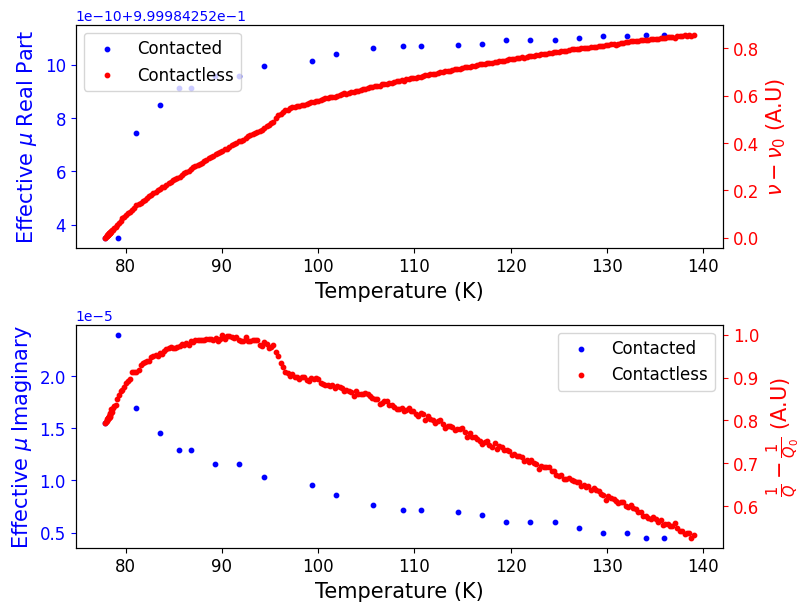

In [20]:
# temp_inds = np.logical_and(res_temps[j]>78, res_temps[j]<137)
# act_mus = np.zeros(len(res_temps[j][temp_inds]),dtype=np.complex128)
# for i, rho in enumerate(resists[j][temp_inds]):
#     act_mus[i] = calc_mu(omega,rho,rho,a,a)
# bonus_inds = np.logical_and(bonus_temp>78, bonus_temp<137)
# bonus_mus = np.zeros(len(bonus_temp[bonus_inds]),dtype=np.complex128)
# for i, rho in enumerate(bonus_res[bonus_inds]):
#     bonus_mus[i] = calc_mu(omega,rho,rho,a,a)

fig4 = plt.figure(constrained_layout = True,figsize=(8,6))
ax1 = fig4.add_subplot(2, 1, 1)
ax2 = fig4.add_subplot(2, 1, 2)
ax1.set_xlabel('Temperature (K)',fontsize = 15)
ax1.set_ylabel(r'Effective $\mu$ Real Part',fontsize = 15, color='blue')
ax1.tick_params('y', colors='blue', labelsize=12)
ax1a = ax1.twinx()
ax2a = ax2.twinx()

# Plot on the twin axis
ax1a.scatter(scanTs[1][0][0],(1+(-(scanFs[1][0]-empty_res[1])/120)/np.max(np.abs(-(scanFs[1][0]-empty_res[1])/120)))[0],label = 'Contacted',c='blue',s=10)
ax1a.scatter(scanTs[1][0],1+(-(scanFs[1][0]-empty_res[1])/120)/np.max(np.abs(-(scanFs[1][0]-empty_res[1])/120)),c='red',s=10,label = 'Contactless')
# ax1a.scatter(scanTs[1][0],1+(-(scanFs[1][0]-empty_res[1])/120)/np.max(np.abs(-(scanFs[1][0]-empty_res[1])/120)),c='red',s=10,label = 'Literature Values')
ax1a.set_ylabel(r'$\nu-\nu_0$ (A.U)', color='red',fontsize = 15)
ax1a.tick_params('y', colors='red', labelsize=12)
ax1.scatter(res_temps[1][temp_inds[1]],np.real(act_mus[1]),label = 'Contacted',c='blue',s=10)
# ax1.scatter(bonus_temp[bonus_inds],np.real(bonus_mus),c='orange',label = 'Literature Values',s=10)


# ax2.scatter(scanTs[1][0],(1/np.array(scanQs[1][0])-1/emptyQs[1])*32+.008,c='red',s=6,label = 'Fit')
ax2.set_xlabel('Temperature (K)',fontsize = 15)
ax2.set_ylabel(r'Effective $\mu$ Imaginary',fontsize = 15, color='blue')
ax2.tick_params('y', colors='blue', labelsize=12)
# Plot on the twin axis
ax2a.scatter(scanTs[1][0][0],(((1/np.array(scanQs[1][0])-1/emptyQs[1])-.001)/np.max(np.abs(((1/np.array(scanQs[1][0])-1/emptyQs[1])-.001))))[0],label = 'Contacted',c='blue',s=10)
ax2a.scatter(scanTs[1][0],((1/np.array(scanQs[1][0])-1/emptyQs[1])-.001)/np.max(np.abs(((1/np.array(scanQs[1][0])-1/emptyQs[1])-.001))),c='red',s=10,label = 'Contactless')
ax2a.set_ylabel(r'$\frac{1}{Q}-\frac{1}{Q_0}$ (A.U)', color='red',fontsize = 15)
ax2a.tick_params('y', colors='red', labelsize=12)
ax2.scatter(res_temps[1][temp_inds[1]],np.abs(np.imag(act_mus[1])),label = 'Contacted',c='blue',s=10)
# ax2.scatter(bonus_temp[bonus_inds],np.abs(np.imag(bonus_mus)),c='orange',label = 'Literature Values',s =10)


ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='x', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax1a.legend(fontsize = 'large')
_ = ax2a.legend(fontsize = 'large')

Make Plot of mu

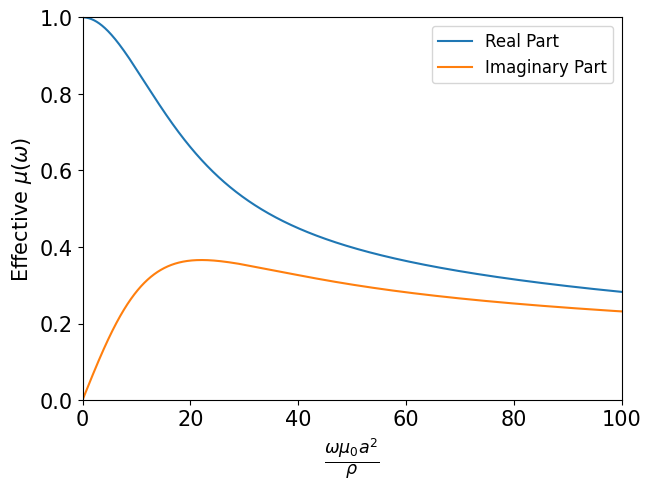

In [ ]:
rhos = np.logspace(-6.6,-3,5000)
mu_0 = 4*np.pi*1e-7
mus = np.zeros(len(rhos),dtype=np.complex128)
a = 1.4e-3
omega = 1.8699e6*2*np.pi
for i, rho in enumerate(rhos):
    mus[i] = calc_mu(omega,rho,rho,a,a)
fig4 = plt.figure(constrained_layout = True)
ax1 = fig4.add_subplot(1, 1, 1)
ax1.set_xlabel(r'$\frac{\omega \mu_0 a^2}{\rho}$',fontsize=18)
ax1.set_ylabel(r'Effective $\mu(\omega)$',fontsize=15)
ax1.plot(mu_0*omega*a*a/rhos,np.real(mus),label = 'Real Part')
ax1.plot(mu_0*omega*a*a/rhos,np.abs(np.imag(mus)),label = 'Imaginary Part')
ax1.set_xlim(0,100)
ax1.set_ylim(0,1)
ax1.tick_params(axis='x', labelsize=15)
ax1.tick_params(axis='y', labelsize=15)
_ = ax1.legend(fontsize='large')

Plastic Deformaton of Hg1201

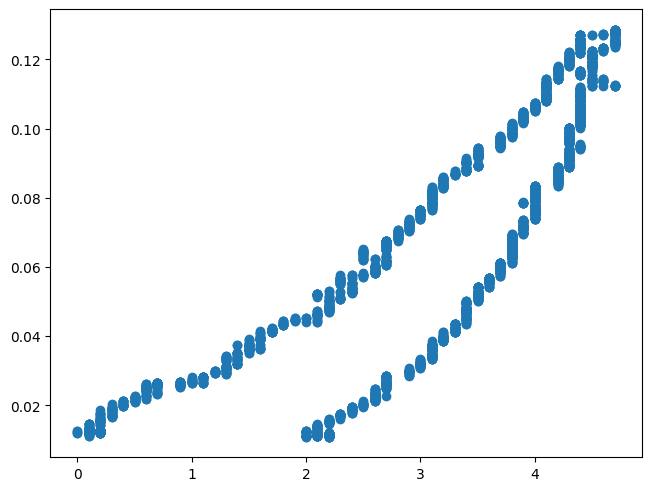

In [ ]:
read_path = 'C:/Users/blake/Documents/VSCode/Python/Greven/RawData/JZ212_2PlasticDef.txt'
read_path = 'C:/Users/blake/Documents/VSCode/Python/Greven/RawData/JZ212_1PlasticDef.txt'
all_data = np.genfromtxt(read_path, delimiter='\t')
# print(all_data)
x = []
y = []
for row in range(len(all_data)):
    x.append(all_data[row][1])
    y.append(all_data[row][2])
x = np.array(x)
y = np.array(y)
# inds = np.logical_and(y>66850, y<66999)
# inds = np.logical_and(y>0, y<66800)

fig4 = plt.figure(constrained_layout = True)
ax1 = fig4.add_subplot(1, 1, 1)
# _ = ax1.scatter(x[inds],y[inds])
_ = ax1.scatter((np.max(y)-y)/50,x)